In [76]:
import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

# Упражнение 2.2

Пилообразный сигнал линейно нарастает от -1 до 1, а затем резко падает до -1 и повторяется.

Напишите класс, называемые SawtoothSignal, расширяющий signal и предоставляющий evaluate для оценки пилообразного сигнала.

Вычислите спектр пилообразного сигнала. Как соотносится его гармоническая структура с треугольным и прямоугольным.

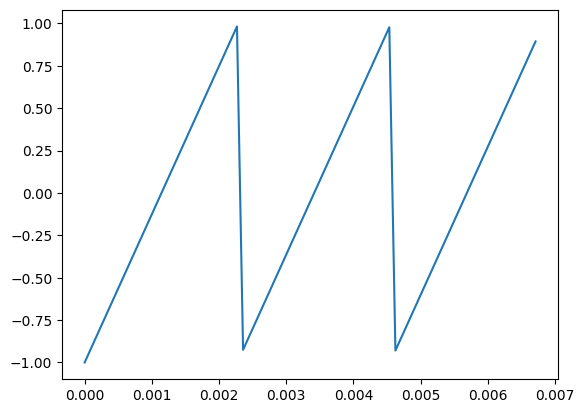

In [77]:
from thinkdsp import Signal
from thinkdsp import unbias, normalize
import numpy as np

class SawtoothSignal(Signal):
  def __init__(self, freq=440, amp=1.0, offset=0, func=np.sin):
        """Initializes a sinusoidal signal.

        freq: float frequency in Hz
        amp: float amplitude, 1.0 is nominal max
        offset: float phase offset in radians
        func: function that maps phase to amplitude
        """
        self.freq = freq
        self.amp = amp
        self.offset = offset
        self.func = func

  @property
  def period(self):
    """Period of the signal in seconds.

    returns: float seconds
    """
    return 1.0 / self.freq

  def evaluate(self, ts):
    ts = np.asarray(ts)
    cycles = self.freq * ts + self.offset / (np.pi * 2)
    frac, _ = np.modf(cycles)
    ys = normalize(unbias(frac), self.amp)
    return ys

sawtooth = SawtoothSignal()
sawtooth.plot()

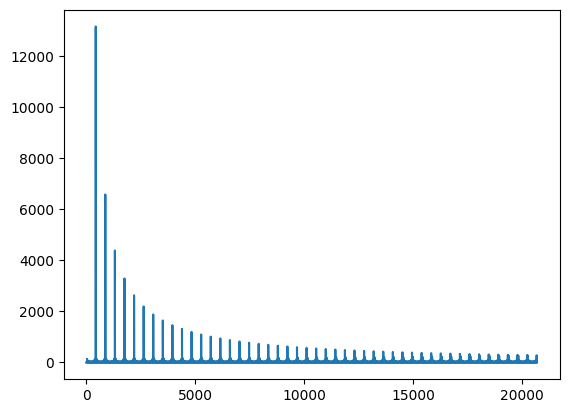

In [78]:
sawtooth_wave = sawtooth.make_wave(duration=1, framerate=41400)
sawtooth_spectrum = sawtooth_wave.make_spectrum()
sawtooth_spectrum.plot()

Сгенерируем прямоугольный и треуголный сигналы для сравнения:

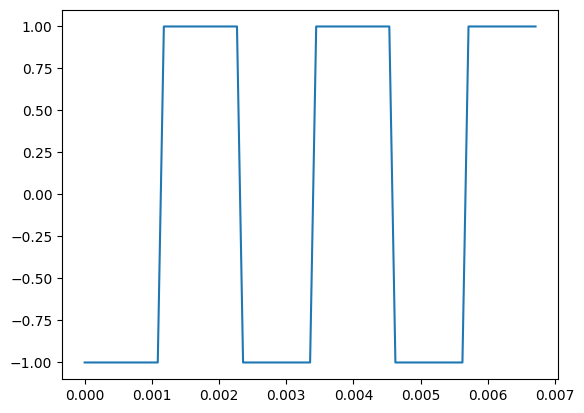

In [79]:
from thinkdsp import SquareSignal

square = SquareSignal()
square.plot()

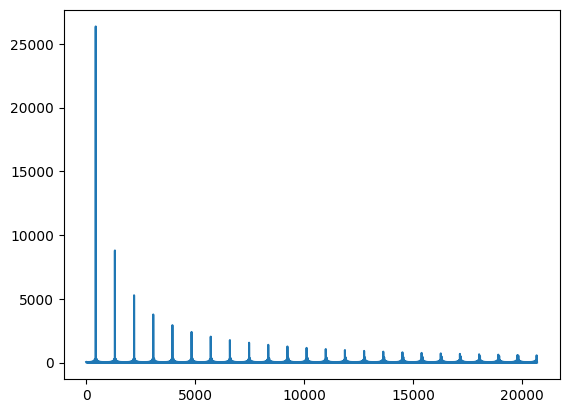

In [80]:
square_wave = square.make_wave(duration=1, framerate=41400)
square_spectrum = square_wave.make_spectrum()
square_spectrum.plot()

Можно заметить, что квадратный сигнал пропускает некоторые гармоники, но оставляет соотношения амплитуд теми же.

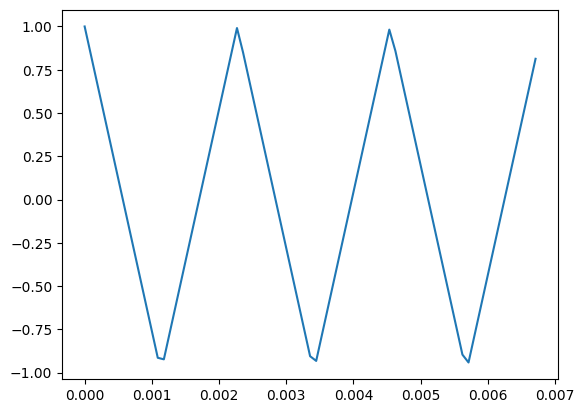

In [81]:
from thinkdsp import TriangleSignal

triangle = TriangleSignal()
triangle.plot()

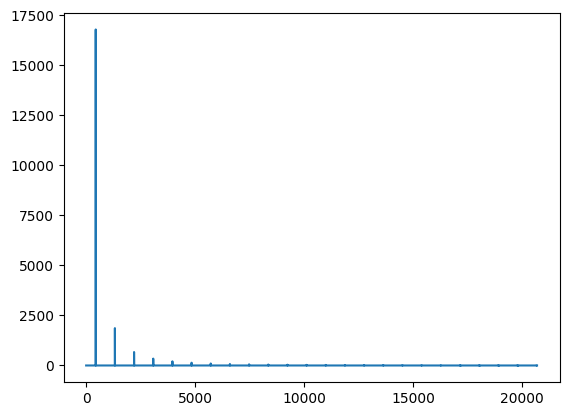

In [82]:
triangle_wave = triangle.make_wave(duration=1, framerate=41400)
triangle_spectrum = triangle_wave.make_spectrum()
triangle_spectrum.plot()

Треугольный сигнал содержит те же гармоники, что и квадратный, но их амплитуды меньше.

# Упражнение 2.3

Создайте прямоугольный сигнал 1100 Гц и вычислите wave с выборками 10 000 кадров в секунду. Постройте спектр и убедитесь, что большинство гармоник "завернуты" из-за биений. Слышны ли последствия этого при проигрывании?

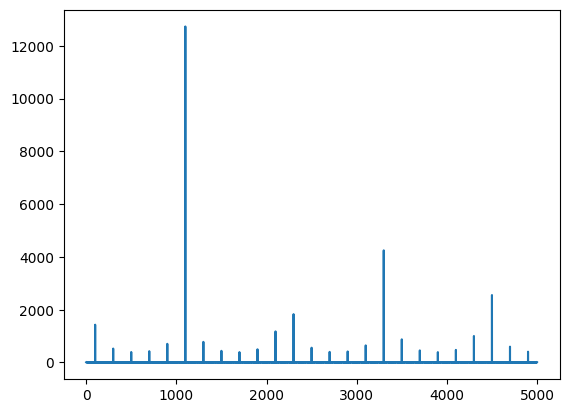

In [83]:
from thinkdsp import SquareSignal

square = SquareSignal(freq=1100)
square_wave = square.make_wave(duration = 2, framerate = 10000)
square_spectrum = square_wave.make_spectrum()
square_spectrum.plot()

In [84]:
square_wave.make_audio()

Можно увидеть, что гармоники не соответствуют ожидаемым (как и в примере в руководстве) – гармоники заворачиваются из-за частоты дескретизации, что можно услышать на записи.

# Упражнение 2.4

Возьмите объект Spectrum и распечатайте несколько первых значений spectrum.fs. Убедитесь, что они начинаются с нуля, то есть Spectrum.hs[0] - амплитуда компоненты с частотой 0. Но что это значит?

Проведите такой эксперимент:



1.   Создайте треугольный сигнал с частотой 440 Гц и wave длительностью 0,01 секунд. Распечатайте сигнал.
2.   Создайте объект Spectrum и распечатайте Spectrum.hs[0]. Каковы амплитуды и фаза этого компонента?
3.   Установите Spectrum.hs[0] = 100. Как эта операция повлияет на сигнал? Подсказка: Spectrum дает метод, называемый make_wave, высчитывающий wave, соответствующий Spectrum.

1. Созданный и распечатанный сигнал:

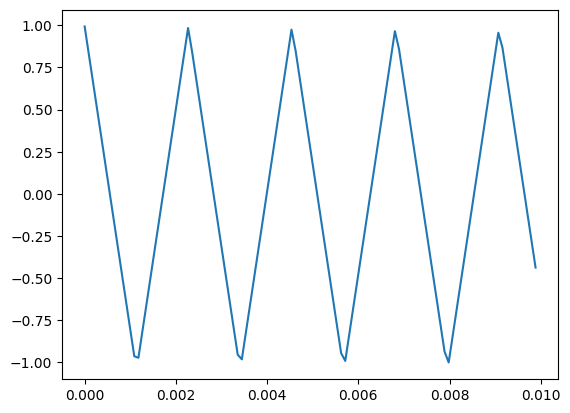

In [85]:
from thinkdsp import TriangleSignal

triangle = TriangleSignal(freq=440)
triangle_wave = triangle.make_wave(duration=0.01)
triangle_wave.plot()

In [86]:
triangle_spectrum = triangle_wave.make_spectrum()
triangle_spectrum.hs[0]

(1.0436096431476471e-14+0j)

2. Амплитуда близка к нулю, а фаза равна нулю.

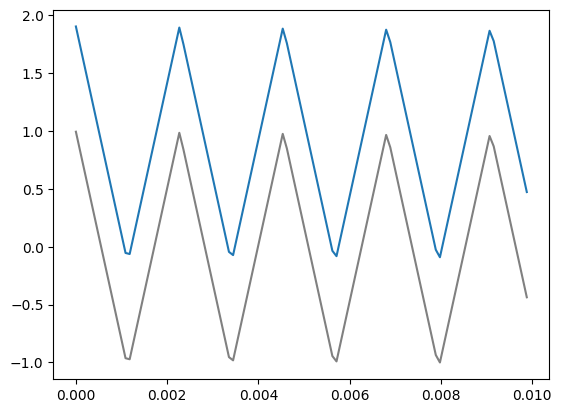

In [87]:
triangle_spectrum.hs[0] = 100
triangle_wave_modified= triangle_spectrum.make_wave()
triangle_wave.plot(color='gray')
triangle_wave_modified.plot()

3. При изменении значения hs[0] происходит сдвиг амплитуды всего сигнала.

# Упражнение 2.5

Напишите функцию, принимающую Spectrum, как параметр и изменяющую его делением каждого элемента hs на соответсвующую частоту из fs. Подсказка: посколькую деление на ноль не определено, надо задать Spectrum.hs[0] = 0.

Проверьте функцию, используя прямоугольный, треугольный и пилообразный сигналы:

1.   Вычислите Spectrum и распечатайте его.
2.   Измените Spectrum, вновь используя свою функцию, и распечатайте его.
3.   Используйте Spectrum.make_wave, чтобы сделать wave из изменённого Spectrum, и прослушайте его. Как эта операция повлияла на сигнал?

In [88]:
from thinkdsp import SawtoothSignal, SquareSignal, TriangleSignal

def divide_spectrum(spectrum):
  spectrum.hs[1:] /= spectrum.fs[1:]
  spectrum.hs[0] = 0

In [89]:
triangle_wave = TriangleSignal().make_wave(duration=1)
triangle_wave.make_audio()

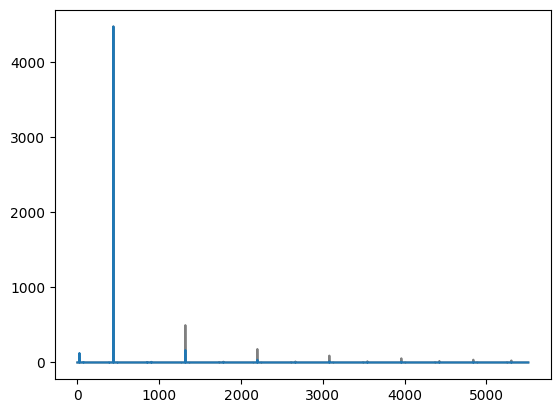

In [90]:
triangle_spectrum = triangle_wave.make_spectrum()
triangle_spectrum.plot(color='gray')
divide_spectrum(triangle_spectrum)
triangle_spectrum.scale(440)
triangle_spectrum.plot()

In [91]:
triangle_wave_modified = triangle_spectrum.make_wave()
triangle_wave_modified.make_audio()

In [92]:
square_wave = SquareSignal().make_wave(duration=1)
square_wave.make_audio()

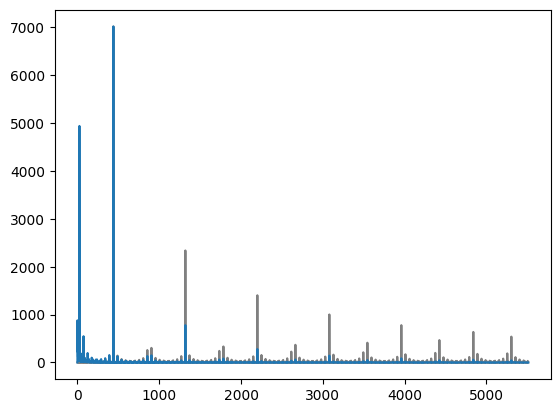

In [93]:
square_spectrum = square_wave.make_spectrum()
square_spectrum.plot(color='gray')
divide_spectrum(square_spectrum)
square_spectrum.scale(440)
square_spectrum.plot()

In [94]:
square_wave_modified = square_spectrum.make_wave()
square_wave_modified.make_audio()

In [95]:
sawtooth_wave = SawtoothSignal().make_wave(duration=1)
sawtooth_wave.make_audio()

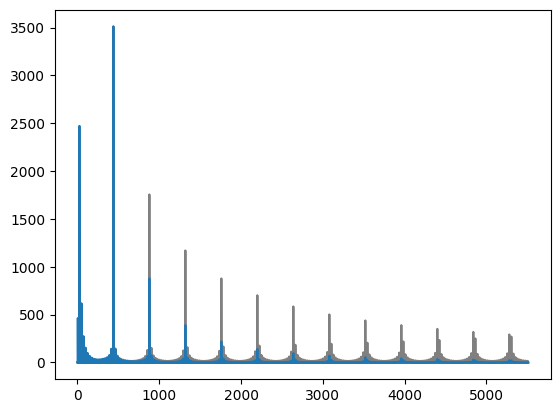

In [96]:
sawtooth_spectrum = sawtooth_wave.make_spectrum()
sawtooth_spectrum.plot(color='gray')
divide_spectrum(sawtooth_spectrum)
sawtooth_spectrum.scale(440)
sawtooth_spectrum.plot()

In [97]:
sawtooth_wave_modified = sawtooth_spectrum.make_wave()
sawtooth_wave_modified.make_audio()

Результатом работы функции стало уменьшение амплитуды частот, кроме фундаментальной.

# Упражнение 2.6

У треугольных и прямоугольных сигналов есть только нечетные гармоники; в пилообразном сигнале есть и четные, и нечетные гармоники. Гармоники прямоугольных и пилообразных сигналов уменьшаются пропорционально
$1/f$; гармоники треугольных сигналов - пропорционально
$1/f^{2}$. Можно ли найти сигнал, состоящий из четных и нечетных гармоник, спадающих пропорционально $1/f^{2}$?

Подсказка: для этого есть два способа. Можно собрать желаемый сигнал из синусоид, а можно взять сигнал со спектром, похожим на необходимый, и изменять его параметры.

Пилообразный сигнал уже содержит все нужные гармоники. Чтобы изменить ампллитуды, воспользуемся функцией из предыдущего пункта.

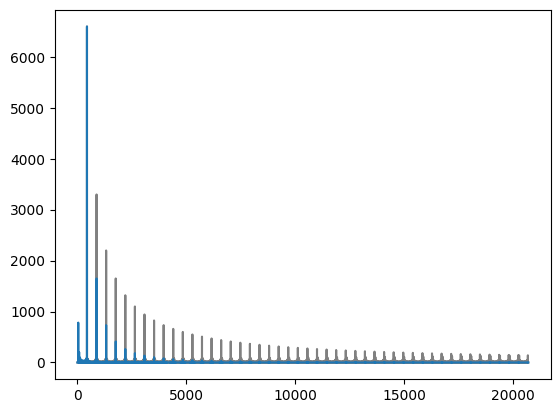

In [98]:
start_wave = SawtoothSignal().make_wave(duration=0.5, framerate = 41400)
spectrum = start_wave.make_spectrum()
spectrum.plot(color='gray')
divide_spectrum(spectrum)
spectrum.scale(440)
spectrum.plot()